# Goal: Exploring available libraries to Rotate or tilt an image using different 

### Packages used: OpenCV, imutils, Scipy
- To install OpenCV refer the steps: https://limitlessdatascience.wordpress.com/2019/07/28/installation-steps-for-3-important-deep-learning-packages/
- To install imutils: Run this command from the jupyter notebook: !pip install imutils

#### input: is an image ('DemoImage.png')
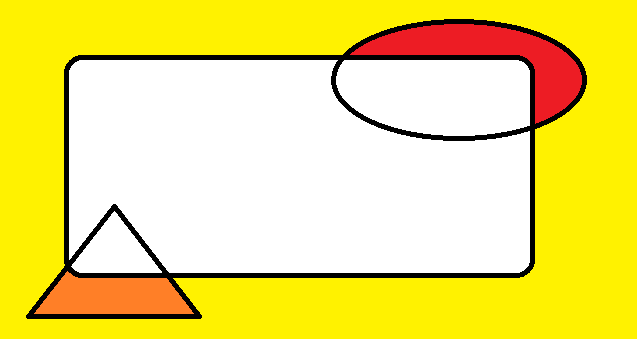
#### Output: tilted image by x angle


In [1]:
import cv2       
import imutils    # we need to install cv2 and imutils 
import scipy      #this lib is already present in the anaconda-jupyter notebook

# Versions used for this demonstration
print('OpenCV version:',cv2.__version__)
print('imutils version',imutils.__version__)
print('scipy version',scipy.__version__)

OpenCV version: 4.1.0
imutils version 0.5.2
scipy version 0.19.1


In [2]:
# To read an image we will use opencv
image = cv2.imread('DemoImage.png')   # will return numpy matrix
image.shape  # 3 indicates its a colour image

(339, 637, 3)

In [3]:
# To print this image we can use matplotlib or we can use PIL. 
# For PIL installation: run this command: !pip install PIL

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
#to print the output inline that is in the notebook using matplotlib
from PIL import Image

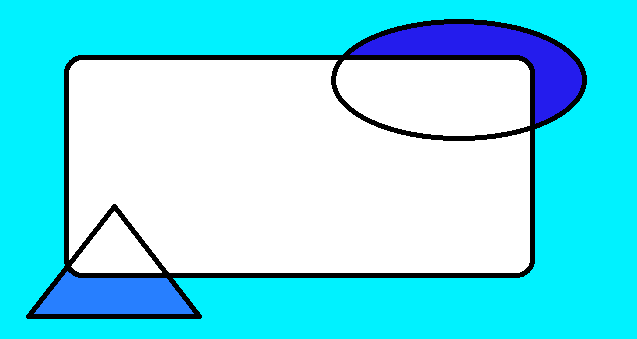

In [5]:
Image.fromarray(image)  

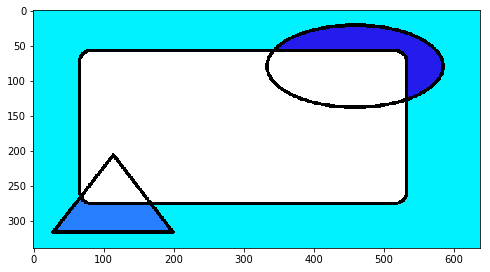

In [6]:
plt.close()    #1st closing previously opened image to clean the memory
plt.figure(figsize=(8,8))  #increase the size of the new image
plt.imshow(image)

## NOTE: now if we see an image colou is different. 
- This is becuase OpenCV read it in BGR format and our image is in RGB format we need to change it

In [7]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #convert it into RGB format

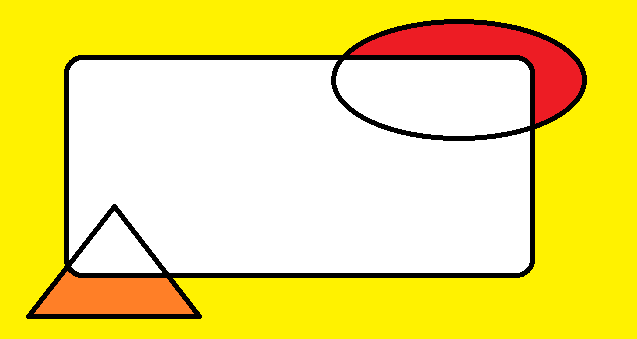

In [8]:
Image.fromarray(image)  

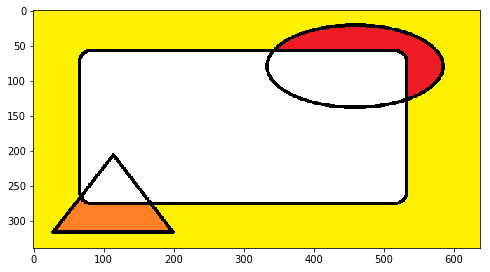

In [9]:
plt.close()    #1st closing previously opened image to clean the memory
plt.figure(figsize=(8,8))  #increase the size of the new image
plt.imshow(image)

# Now we will tilt out input image and will take a look at the outputs of each technique:

### 1. Using Scipy ndimage

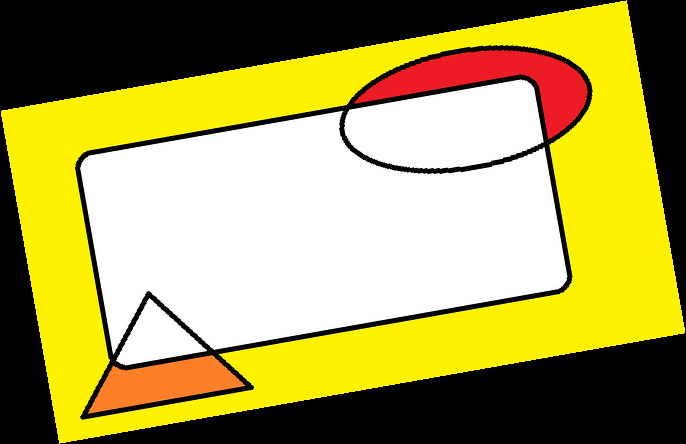

In [10]:
from scipy import ndimage
rotated = ndimage.rotate(image, 10)     #rotation angle in degree
Image.fromarray(rotated)    #rotated in Anti-clock wise direction

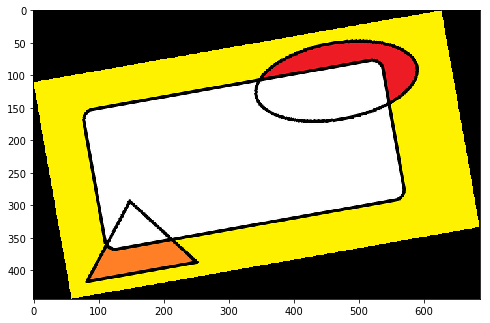

In [11]:
plt.close()    #1st closing previously opened image to clean the memory
plt.figure(figsize=(8,8))  #increase the size of the new image
plt.imshow(rotated)

In [12]:
rotated.shape   # Original input image size is:(339, 637, 3) Rotated Image size is increased

(444, 686, 3)

### 2. Using imutils rotate_bound

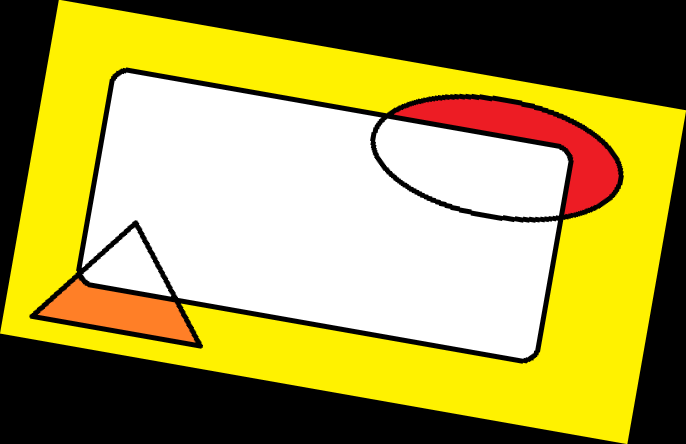

In [13]:
rotated = imutils.rotate_bound((image), angle=10)
Image.fromarray(rotated)  #rotated in Clock wise direction

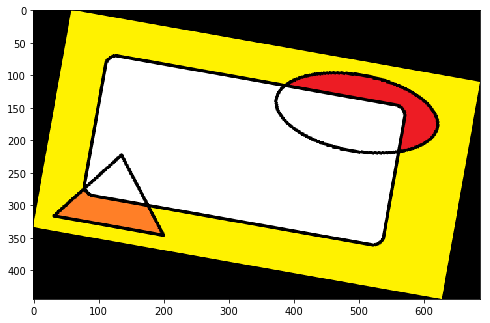

In [14]:
plt.close()    #1st closing previously opened image to clean the memory
plt.figure(figsize=(8,8))  #increase the size of the new image
plt.imshow(rotated)

In [15]:
rotated.shape   # Original input image size is:(339, 637, 3) Rotated Image size is increased

(444, 686, 3)

### 3. Using OpenCV functions:  getRotationMatrix2D and warpAffine

In [16]:
import numpy as np
image_center = tuple(np.array(image.shape[1::-1]) / 2)
rot_mat = cv2.getRotationMatrix2D(image_center, 10, 1.0)
result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)

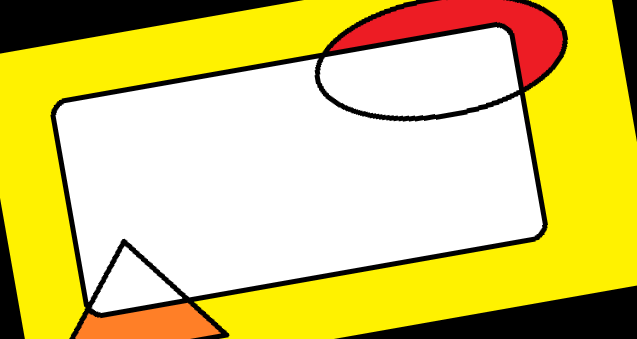

In [17]:
Image.fromarray(result)  

In [ ]:
result.shape # Original input image size is:(339, 637, 3) Rotated Image size is same as the input image

(339, 637, 3)

In [ ]:
plt.close()    #1st closing previously opened image to clean the memory
plt.figure(figsize=(8,8))  #increase the size of the new image
plt.imshow(result)